###Data

In [ ]:
!pip install xlsxwriter

In [ ]:
import xlsxwriter
import numpy as np
import pandas as pd
import datetime

In [ ]:
df = pd.read_excel("/content/true_ais.xlsx")
df

,วันที่,ราคาเปิด,ราคาสูงสุด,ราคาต่ำสุด,ราคาปิด,เปลี่ยนแปลง,%เปลี่ยนแปลง,ปริมาณรวม(หุ้น),มูลค่ารวม(000 บาท)
0,2022-02-23,5.10,5.10,4.90,5.00,-0.10,-1.96,"566,179,685","2,821,402.42"
1,2022-02-22,5.10,5.15,5.00,5.10,0.00,0.00,"306,276,085","1,560,052.19"
2,2022-02-21,5.55,5.55,5.10,5.10,-0.60,-10.53,"935,427,935","4,936,814.61"
3,2022-02-18,5.10,5.70,5.10,5.70,0.55,10.68,"821,905,439","4,483,379.94"
4,2022-02-17,5.00,5.15,4.98,5.15,0.17,3.41,"357,849,605","1,818,756.75"
...,...,...,...,...,...,...,...,...,...
231,2021-09-07,193.00,198.00,192.50,197.50,6.00,3.13,"20,590,741","4,033,473.62"
232,2021-09-06,190.50,192.00,189.00,191.50,1.50,0.79,"7,260,564","1,384,427.07"
233,2021-09-03,189.00,190.00,188.00,190.00,1.50,0.80,"6,706,201","1,270,107.44"
234,2021-09-02,187.00,190.50,186.50,188.50,2.50,1.34,"16,102,169","3,044,953.12"


###เตรียมข้อมูล

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   วันที่              236 non-null    datetime64[ns]
 1   ราคาเปิด            236 non-null    float64       
 2   ราคาสูงสุด          236 non-null    float64       
 3   ราคาต่ำสุด          236 non-null    float64       
 4   ราคาปิด             236 non-null    float64       
 5   เปลี่ยนแปลง         236 non-null    float64       
 6   %เปลี่ยนแปลง        236 non-null    float64       
 7   ปริมาณรวม(หุ้น)     236 non-null    object        
 8   มูลค่ารวม(000 บาท)  236 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 16.7+ KB


In [ ]:
df_true = df.iloc[0:118]
df_true

,วันที่,ราคาเปิด,ราคาสูงสุด,ราคาต่ำสุด,ราคาปิด,เปลี่ยนแปลง,%เปลี่ยนแปลง,ปริมาณรวม(หุ้น),มูลค่ารวม(000 บาท)
0,2022-02-23,5.10,5.10,4.90,5.00,-0.10,-1.96,"566,179,685","2,821,402.42"
1,2022-02-22,5.10,5.15,5.00,5.10,0.00,0.00,"306,276,085","1,560,052.19"
2,2022-02-21,5.55,5.55,5.10,5.10,-0.60,-10.53,"935,427,935","4,936,814.61"
3,2022-02-18,5.10,5.70,5.10,5.70,0.55,10.68,"821,905,439","4,483,379.94"
4,2022-02-17,5.00,5.15,4.98,5.15,0.17,3.41,"357,849,605","1,818,756.75"
...,...,...,...,...,...,...,...,...,...
113,2021-09-07,3.38,3.52,3.36,3.50,0.14,4.17,"425,054,306","1,475,044.65"
114,2021-09-06,3.42,3.42,3.36,3.36,-0.04,-1.18,"73,250,847","247,381.32"
115,2021-09-03,3.40,3.40,3.32,3.40,0.02,0.59,"95,861,201","322,554.55"
116,2021-09-02,3.28,3.44,3.28,3.38,0.10,3.05,"351,045,032","1,189,395.09"


In [ ]:
df_true = df.iloc[0:118]
df_true["เครือข่าย"] = "true"
df_true

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,วันที่,ราคาเปิด,ราคาสูงสุด,ราคาต่ำสุด,ราคาปิด,เปลี่ยนแปลง,%เปลี่ยนแปลง,ปริมาณรวม(หุ้น),มูลค่ารวม(000 บาท),เครือข่าย
0,2022-02-23,5.10,5.10,4.90,5.00,-0.10,-1.96,"566,179,685","2,821,402.42",true
1,2022-02-22,5.10,5.15,5.00,5.10,0.00,0.00,"306,276,085","1,560,052.19",true
2,2022-02-21,5.55,5.55,5.10,5.10,-0.60,-10.53,"935,427,935","4,936,814.61",true
3,2022-02-18,5.10,5.70,5.10,5.70,0.55,10.68,"821,905,439","4,483,379.94",true
4,2022-02-17,5.00,5.15,4.98,5.15,0.17,3.41,"357,849,605","1,818,756.75",true
...,...,...,...,...,...,...,...,...,...,...
113,2021-09-07,3.38,3.52,3.36,3.50,0.14,4.17,"425,054,306","1,475,044.65",true
114,2021-09-06,3.42,3.42,3.36,3.36,-0.04,-1.18,"73,250,847","247,381.32",true
115,2021-09-03,3.40,3.40,3.32,3.40,0.02,0.59,"95,861,201","322,554.55",true
116,2021-09-02,3.28,3.44,3.28,3.38,0.10,3.05,"351,045,032","1,189,395.09",true


In [ ]:
dataframe = pd.DataFrame(df_true)
writer = pd.ExcelWriter('true.xlsx', engine='xlsxwriter')
dataframe.to_excel(writer, sheet_name='true')
writer.save()

In [ ]:
df_ais = df.iloc[118:]
df_ais

,วันที่,ราคาเปิด,ราคาสูงสุด,ราคาต่ำสุด,ราคาปิด,เปลี่ยนแปลง,%เปลี่ยนแปลง,ปริมาณรวม(หุ้น),มูลค่ารวม(000 บาท)
118,2022-02-23,230.0,233.0,229.0,233.0,3.0,1.30,"4,536,039","1,048,970.16"
119,2022-02-22,225.0,231.0,225.0,230.0,2.0,0.88,"6,372,769","1,458,088.99"
120,2022-02-21,236.0,237.0,227.0,228.0,-10.0,-4.20,"8,392,239","1,943,557.87"
121,2022-02-18,236.0,239.0,235.0,238.0,-2.0,-0.83,"6,705,878","1,591,493.84"
122,2022-02-17,239.0,242.0,238.0,240.0,3.0,1.27,"11,550,804","2,775,784.56"
...,...,...,...,...,...,...,...,...,...
231,2021-09-07,193.0,198.0,192.5,197.5,6.0,3.13,"20,590,741","4,033,473.62"
232,2021-09-06,190.5,192.0,189.0,191.5,1.5,0.79,"7,260,564","1,384,427.07"
233,2021-09-03,189.0,190.0,188.0,190.0,1.5,0.80,"6,706,201","1,270,107.44"
234,2021-09-02,187.0,190.5,186.5,188.5,2.5,1.34,"16,102,169","3,044,953.12"


In [ ]:
df_ais = df.iloc[118:]
df_ais["เครือข่าย"] = "ais"
df_ais

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,วันที่,ราคาเปิด,ราคาสูงสุด,ราคาต่ำสุด,ราคาปิด,เปลี่ยนแปลง,%เปลี่ยนแปลง,ปริมาณรวม(หุ้น),มูลค่ารวม(000 บาท),เครือข่าย
118,2022-02-23,230.0,233.0,229.0,233.0,3.0,1.30,"4,536,039","1,048,970.16",ais
119,2022-02-22,225.0,231.0,225.0,230.0,2.0,0.88,"6,372,769","1,458,088.99",ais
120,2022-02-21,236.0,237.0,227.0,228.0,-10.0,-4.20,"8,392,239","1,943,557.87",ais
121,2022-02-18,236.0,239.0,235.0,238.0,-2.0,-0.83,"6,705,878","1,591,493.84",ais
122,2022-02-17,239.0,242.0,238.0,240.0,3.0,1.27,"11,550,804","2,775,784.56",ais
...,...,...,...,...,...,...,...,...,...,...
231,2021-09-07,193.0,198.0,192.5,197.5,6.0,3.13,"20,590,741","4,033,473.62",ais
232,2021-09-06,190.5,192.0,189.0,191.5,1.5,0.79,"7,260,564","1,384,427.07",ais
233,2021-09-03,189.0,190.0,188.0,190.0,1.5,0.80,"6,706,201","1,270,107.44",ais
234,2021-09-02,187.0,190.5,186.5,188.5,2.5,1.34,"16,102,169","3,044,953.12",ais


In [ ]:
dataframe = pd.DataFrame(df_ais)
writer = pd.ExcelWriter('ais.xlsx', engine='xlsxwriter')
dataframe.to_excel(writer, sheet_name='ais')
writer.save()

In [ ]:
df_true_file = pd.read_excel("/content/true.xlsx")
df_true_file

,Unnamed: 0,วันที่,ราคาเปิด,ราคาสูงสุด,ราคาต่ำสุด,ราคาปิด,เปลี่ยนแปลง,%เปลี่ยนแปลง,ปริมาณรวม(หุ้น),มูลค่ารวม(000 บาท),เครือข่าย
0,0,2022-02-23,5.10,5.10,4.90,5.00,-0.10,-1.96,"566,179,685","2,821,402.42",True
1,1,2022-02-22,5.10,5.15,5.00,5.10,0.00,0.00,"306,276,085","1,560,052.19",True
2,2,2022-02-21,5.55,5.55,5.10,5.10,-0.60,-10.53,"935,427,935","4,936,814.61",True
3,3,2022-02-18,5.10,5.70,5.10,5.70,0.55,10.68,"821,905,439","4,483,379.94",True
4,4,2022-02-17,5.00,5.15,4.98,5.15,0.17,3.41,"357,849,605","1,818,756.75",True
...,...,...,...,...,...,...,...,...,...,...,...
113,113,2021-09-07,3.38,3.52,3.36,3.50,0.14,4.17,"425,054,306","1,475,044.65",True
114,114,2021-09-06,3.42,3.42,3.36,3.36,-0.04,-1.18,"73,250,847","247,381.32",True
115,115,2021-09-03,3.40,3.40,3.32,3.40,0.02,0.59,"95,861,201","322,554.55",True
116,116,2021-09-02,3.28,3.44,3.28,3.38,0.10,3.05,"351,045,032","1,189,395.09",True


In [ ]:
df_ais_file = pd.read_excel("/content/ais.xlsx")
df_ais_file

,Unnamed: 0,วันที่,ราคาเปิด,ราคาสูงสุด,ราคาต่ำสุด,ราคาปิด,เปลี่ยนแปลง,%เปลี่ยนแปลง,ปริมาณรวม(หุ้น),มูลค่ารวม(000 บาท),เครือข่าย
0,118,2022-02-23,230.0,233.0,229.0,233.0,3.0,1.30,"4,536,039","1,048,970.16",ais
1,119,2022-02-22,225.0,231.0,225.0,230.0,2.0,0.88,"6,372,769","1,458,088.99",ais
2,120,2022-02-21,236.0,237.0,227.0,228.0,-10.0,-4.20,"8,392,239","1,943,557.87",ais
3,121,2022-02-18,236.0,239.0,235.0,238.0,-2.0,-0.83,"6,705,878","1,591,493.84",ais
4,122,2022-02-17,239.0,242.0,238.0,240.0,3.0,1.27,"11,550,804","2,775,784.56",ais
...,...,...,...,...,...,...,...,...,...,...,...
113,231,2021-09-07,193.0,198.0,192.5,197.5,6.0,3.13,"20,590,741","4,033,473.62",ais
114,232,2021-09-06,190.5,192.0,189.0,191.5,1.5,0.79,"7,260,564","1,384,427.07",ais
115,233,2021-09-03,189.0,190.0,188.0,190.0,1.5,0.80,"6,706,201","1,270,107.44",ais
116,234,2021-09-02,187.0,190.5,186.5,188.5,2.5,1.34,"16,102,169","3,044,953.12",ais


In [ ]:
df = pd.concat([df_true_file,df_ais_file], ignore_index=True)
df

,Unnamed: 0,วันที่,ราคาเปิด,ราคาสูงสุด,ราคาต่ำสุด,ราคาปิด,เปลี่ยนแปลง,%เปลี่ยนแปลง,ปริมาณรวม(หุ้น),มูลค่ารวม(000 บาท),เครือข่าย
0,0,2022-02-23,5.10,5.10,4.90,5.00,-0.10,-1.96,"566,179,685","2,821,402.42",True
1,1,2022-02-22,5.10,5.15,5.00,5.10,0.00,0.00,"306,276,085","1,560,052.19",True
2,2,2022-02-21,5.55,5.55,5.10,5.10,-0.60,-10.53,"935,427,935","4,936,814.61",True
3,3,2022-02-18,5.10,5.70,5.10,5.70,0.55,10.68,"821,905,439","4,483,379.94",True
4,4,2022-02-17,5.00,5.15,4.98,5.15,0.17,3.41,"357,849,605","1,818,756.75",True
...,...,...,...,...,...,...,...,...,...,...,...
231,231,2021-09-07,193.00,198.00,192.50,197.50,6.00,3.13,"20,590,741","4,033,473.62",ais
232,232,2021-09-06,190.50,192.00,189.00,191.50,1.50,0.79,"7,260,564","1,384,427.07",ais
233,233,2021-09-03,189.00,190.00,188.00,190.00,1.50,0.80,"6,706,201","1,270,107.44",ais
234,234,2021-09-02,187.00,190.50,186.50,188.50,2.50,1.34,"16,102,169","3,044,953.12",ais


In [ ]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df

,วันที่,ราคาเปิด,ราคาสูงสุด,ราคาต่ำสุด,ราคาปิด,เปลี่ยนแปลง,%เปลี่ยนแปลง,ปริมาณรวม(หุ้น),มูลค่ารวม(000 บาท),เครือข่าย
0,2022-02-23,5.10,5.10,4.90,5.00,-0.10,-1.96,"566,179,685","2,821,402.42",True
1,2022-02-22,5.10,5.15,5.00,5.10,0.00,0.00,"306,276,085","1,560,052.19",True
2,2022-02-21,5.55,5.55,5.10,5.10,-0.60,-10.53,"935,427,935","4,936,814.61",True
3,2022-02-18,5.10,5.70,5.10,5.70,0.55,10.68,"821,905,439","4,483,379.94",True
4,2022-02-17,5.00,5.15,4.98,5.15,0.17,3.41,"357,849,605","1,818,756.75",True
...,...,...,...,...,...,...,...,...,...,...
231,2021-09-07,193.00,198.00,192.50,197.50,6.00,3.13,"20,590,741","4,033,473.62",ais
232,2021-09-06,190.50,192.00,189.00,191.50,1.50,0.79,"7,260,564","1,384,427.07",ais
233,2021-09-03,189.00,190.00,188.00,190.00,1.50,0.80,"6,706,201","1,270,107.44",ais
234,2021-09-02,187.00,190.50,186.50,188.50,2.50,1.34,"16,102,169","3,044,953.12",ais


In [ ]:
df.drop(['เปลี่ยนแปลง','%เปลี่ยนแปลง','ปริมาณรวม(หุ้น)','มูลค่ารวม(000 บาท)'], axis=1, inplace=True)
df

,วันที่,ราคาเปิด,ราคาสูงสุด,ราคาต่ำสุด,ราคาปิด,เครือข่าย
0,2022-02-23,5.10,5.10,4.90,5.00,True
1,2022-02-22,5.10,5.15,5.00,5.10,True
2,2022-02-21,5.55,5.55,5.10,5.10,True
3,2022-02-18,5.10,5.70,5.10,5.70,True
4,2022-02-17,5.00,5.15,4.98,5.15,True
...,...,...,...,...,...,...
231,2021-09-07,193.00,198.00,192.50,197.50,ais
232,2021-09-06,190.50,192.00,189.00,191.50,ais
233,2021-09-03,189.00,190.00,188.00,190.00,ais
234,2021-09-02,187.00,190.50,186.50,188.50,ais


In [ ]:
df.rename(columns={"วันที่":"date","ราคาเปิด":"open","ราคาสูงสุด":"high","ราคาต่ำสุด":"low","ราคาปิด":"close","เครือข่าย":"network"},inplace=True)
df

,date,open,high,low,close,network
0,2022-02-23,5.10,5.10,4.90,5.00,True
1,2022-02-22,5.10,5.15,5.00,5.10,True
2,2022-02-21,5.55,5.55,5.10,5.10,True
3,2022-02-18,5.10,5.70,5.10,5.70,True
4,2022-02-17,5.00,5.15,4.98,5.15,True
...,...,...,...,...,...,...
231,2021-09-07,193.00,198.00,192.50,197.50,ais
232,2021-09-06,190.50,192.00,189.00,191.50,ais
233,2021-09-03,189.00,190.00,188.00,190.00,ais
234,2021-09-02,187.00,190.50,186.50,188.50,ais


###กราฟและทำนาย

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from matplotlib import pyplot

In [ ]:
df

,date,open,high,low,close,network
0,2022-02-23,5.10,5.10,4.90,5.00,True
1,2022-02-22,5.10,5.15,5.00,5.10,True
2,2022-02-21,5.55,5.55,5.10,5.10,True
3,2022-02-18,5.10,5.70,5.10,5.70,True
4,2022-02-17,5.00,5.15,4.98,5.15,True
...,...,...,...,...,...,...
231,2021-09-07,193.00,198.00,192.50,197.50,ais
232,2021-09-06,190.50,192.00,189.00,191.50,ais
233,2021-09-03,189.00,190.00,188.00,190.00,ais
234,2021-09-02,187.00,190.50,186.50,188.50,ais


In [ ]:
df = df.iloc[0:118] #ais
fig = go.Figure([go.Scatter(x=df['date'], y=df['open'])])
fig.show()

In [ ]:
df = df.iloc[118:]#true
fig = go.Figure([go.Scatter(x=df['date'], y=df['open'])])
fig.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cf05171d0>,
      dtype=object)

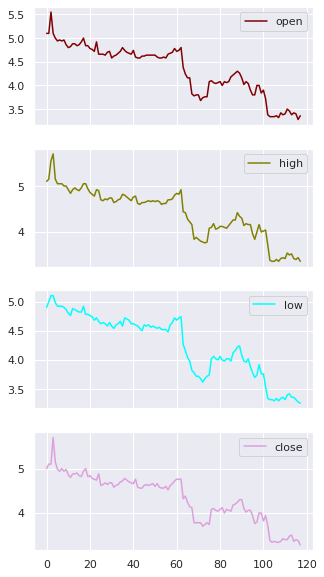

In [ ]:
df = df.iloc[0:118] #ais
df[['open', 'high', 'low', 'close']].plot(kind='line',figsize=(5, 10),  subplots=True, color=['maroon', 'olive', 'cyan', 'plum'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d0054edd0>,
      dtype=object)

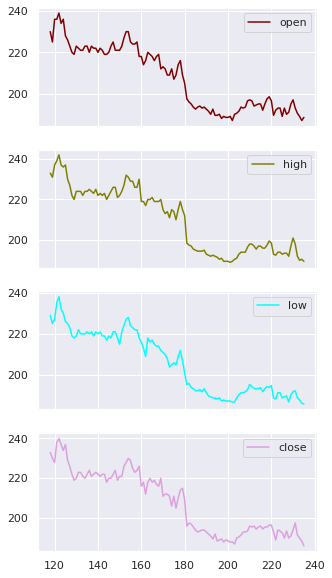

In [ ]:
df = df.iloc[118:] #true
df[['open', 'high', 'low', 'close']].plot(kind='line',figsize=(5, 10),  subplots=True, color=['maroon', 'olive', 'cyan', 'plum'])

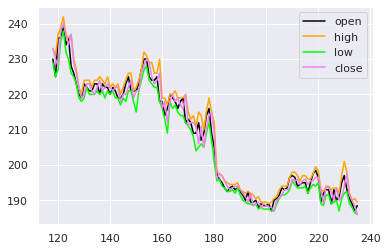

In [ ]:
df = df.iloc[118:]#true
df[['open', 'high', 'low', 'close']].plot(kind='line', color=['black', 'orange', 'lime', 'violet'])

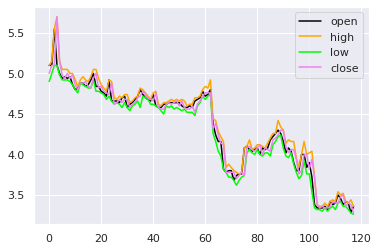

In [ ]:
df = df.iloc[0:118]#ais
df[['open', 'high', 'low', 'close']].plot(kind='line', color=['black', 'orange', 'lime', 'violet'])

7
42


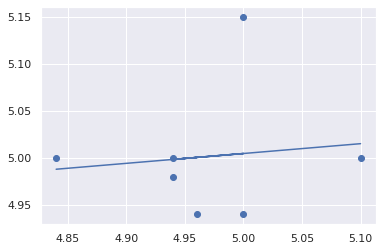

In [ ]:
df = df.iloc[0:118]#ais
data = df[ df['high'] > 5 ]
data = data[ data['low'] < 5 ]
print(len(data))
print(data.size)
open = data['open']
close = data['close']
x = open.values
y = close.values.ravel()
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
a = model.coef_[0]
b = model.intercept_
Ynew = a*x + b
plt.scatter(open, close)
plt.plot(x, Ynew)

In [ ]:
print(Ynew)

[[5.01515244]
 [5.00471037]
 [4.99844512]
 [5.00053354]
 [4.99844512]
 [5.00471037]
 [4.98800305]]


In [ ]:
open = float(input('ราคาเปิดตลาดหุ้น Ais : '))
Ynew = a*open + b
print("ราคาปิดตลาดหุ้น Ais "+'%.2f' %(Ynew)+" บาท")

ราคาเปิดตลาดหุ้น Ais : 6.2
ราคาปิดตลาดหุ้น Ais 5.13 บาท
